In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
# import os
# import csv
from pickle import load
# from math import sqrt
from matplotlib import pyplot as plt
# import keras
from keras.layers import  SpatialDropout1D, BatchNormalization, Dense,  Flatten, Dropout, Convolution2D, Convolution1D, MaxPooling1D, MaxPooling2D, Input
from keras.models import Sequential, Model
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from keras import regularizers
# from pylab import *

<Figure size 432x288 with 0 Axes>

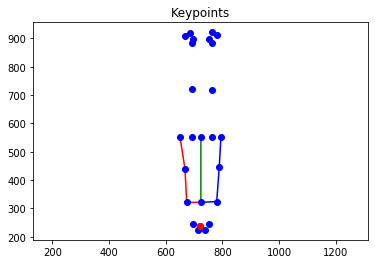

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 318, 16)           1296      
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 106, 16)           0         
_________________________________________________________________
spatial_dropout1d_22 (Spatia (None, 106, 16)           0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 102, 32)           2592      
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 34, 32)            0         
_________________________________________________________________
spatial_dropout1d_23 (Spatia (None, 34, 32)            0         
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 30, 64)           

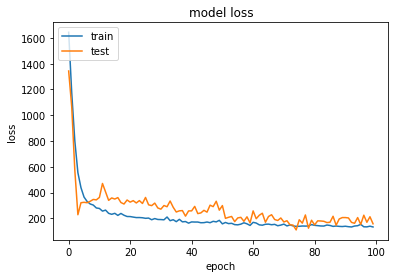

RMSE test 12.086974855670382
corr test 0.6366124545164485


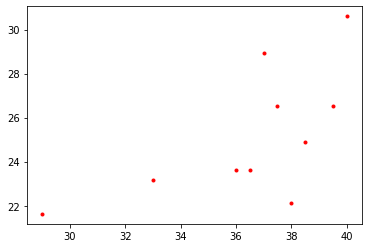

RMSE train 10.50091209436951


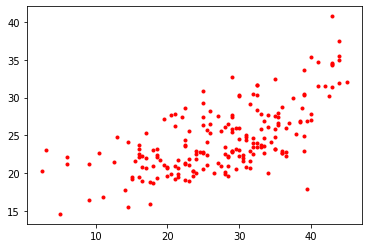

In [15]:
def affiche(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def padd(X):
	length = 0
	X1=[]
	for i in range(len(X)):
		if X[i].shape[1]>length:
			length=X[i].shape[1]
	for i in range(len(X)):
		if X[i].shape[0] < length :
			padding = length - X[i].shape[1]
			pad = np.zeros((2,padding, X[i].shape[2]))
			return_X = np.append(X[i], pad, axis=1)
		else:
			return_X = X[i]
		X1.append(return_X)
	X1 = np.array(X1)
	return X1

def  split_data(X,y, ind_test):
	X_test = []
	y_test=[]
	X_train=[]
	y_train=[]
	for i in range(0, len(y)):
		if i in ind_test:
			X_test.append(X[i])
			y_test.append(y[i])
		else:
			X_train.append(X[i])
			y_train.append(y[i])
	X_test=np.array(X_test)
	X_train=np.array(X_train)
	return X_test , np.array(y_test), X_train, np.array(y_train)

#def define_model():
#
#	inputs= Input(shape=(322, 50))
#	x= inputs
#
#	x=Convolution1D(8,5, activation='relu',padding='same')(x)
#	x=MaxPooling1D(pool_size=5, strides=3,padding='same')(x)
#
#	x=Convolution1D(8,5, activation='relu',padding='same')(x)
#	x=MaxPooling1D(pool_size=3, strides=3,padding='same')(x)
#
#	x=Convolution1D(16,5, activation='relu',padding='same')(x)
#	x=MaxPooling1D(pool_size=3, strides=3,padding='same')(x)
#
#	x=Convolution1D(16,5, activation='relu',padding='same')(x)
#	x=MaxPooling1D(pool_size=3, strides=3,padding='same')(x)
#
#	x=Flatten()(x)
#	x=Dense(100, activation='relu')(x)
#	x=Dropout(0.5)(x)
#	outputs=Dense(1, activation='linear')(x)
#	model = Model(inputs, outputs)
#	model.summary()
#
#	return model

def transforme(X):
	X1 = np.zeros((X.shape[0],X.shape[2], X.shape[1]*X.shape[3]))
	for i in range(X.shape[0]):
		for j in range(X.shape[2]):
			X1[i,j,:] = np.reshape(X[i,:,j,:],(1,X.shape[1]*X.shape[3]))
	return X1

def supp_zeros(X):
	for i in range(len(X)):
		x=X[i]
		for t in range(x.shape[1]):
			for a in range(x.shape[2]):
				if x[0,t,a]==0:
					x[:,t,a]=x[:,t-1,a]
	X[i]=x
	return(X)

def standardize(X):
	for i in range(X.shape[2]):
		mu = np.mean(X[:, :, i])
		sigma = np.std(X[:, :, i])
		if sigma != 0:
			X[:, :, i] = (X[:, :, i] - mu) / sigma

	return X

# def define_model():

# 	inputs= Input(shape=(322, 50))
# 	x= inputs

# 	x=Convolution1D(16,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)
# 	x = BatchNormalization(x)

# 	x=Convolution1D(32,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Convolution1D(64,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Convolution1D(64,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Convolution1D(64,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Convolution1D(64,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Convolution1D(64,5, activation='relu',padding='same')(x)
# 	x=MaxPooling1D(pool_size=2, strides=2,padding='same')(x)

# 	x=Flatten()(x)
# 	x=Dense(100, activation='relu')(x)
# 	x=Dropout(0.5)(x)
# 	outputs=Dense(1, activation='linear')(x)
# 	model = Model(inputs, outputs)
# 	model.summary()
# 	return model

def define_model1(dim1, dim2):
	shape=(dim1, dim2)

	model = Sequential()

	model.add(Convolution1D(16, 5,  activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01), input_shape=shape))
	model.add(MaxPooling1D(3))
	model.add(SpatialDropout1D(0.2))

	model.add(Convolution1D(32, 5, activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
	model.add(MaxPooling1D(3))
	model.add(SpatialDropout1D(0.2))

	model.add(Convolution1D(64, 5, activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
	model.add(MaxPooling1D(3))
	model.add(SpatialDropout1D(0.2))

	model.add(Flatten())
	model.add(Dense(100,  activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
	model.add(Dropout(0.5))
#	model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
#	model.add(Dropout(0.5))
	model.add(Dense(1,  activation='linear' ,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
	model.summary()
	return model

def afficher_points(X): # affiche les 100 premières itérations du tenseur qui contient tout les tenseurs

	for t in range(1):
	    figure(1)
	    x = X[0][t][:]
	    y = X[1][t][:]
	    plt.figure()
	    plt.plot([x[1], x[2]], [y[1], y[2]],'r')
	    plt.plot([x[2], x[3]], [y[2], y[3]],'r')
	    plt.plot([x[3], x[4]], [y[3], y[4]],'r')
	    plt.plot([x[1], x[5]], [y[1], y[5]],'b')
	    plt.plot([x[5], x[6]], [y[5], y[6]],'b')
	    plt.plot([x[6], x[7]], [y[6], y[7]],'b')
	    plt.plot([x[1], x[8]], [y[1], y[8]],'g')


	    plt.plot(x, y, 'bo')
	    plt.title("Keypoints")
	    plt.plot(x[0], y[0], 'ro')
	    axis("equal")
	    plt.show()
	    clf()

##################################################################
##################################################################
##################################################################
X = pickle.load( open(PATH+"Matrices.p", "rb" ) )

Personnes = np.load(PATH+'Personnes.npy')
y = np.load(PATH+'Notes.npy')
longueur = np.zeros(len(y))
for i in range(len(y)):
	longueur[i]=X[i].shape[1]

afficher_points(X[0])
for i in range(len(X)):
	X[i]=X[i][:,:,0:8]

X = supp_zeros(X) #enleve les 0 dus aux articulations manquantes
X = padd(X) # padding des sequences
X = transforme(X) # pour passer à 30 valeurs plutot que 2*15
X = standardize(X) # moy=0, std = 1


#opt=SGD(lr=.0001, momentum=0)
opt = keras.optimizers.Adam(lr=.001)

nb_epochs = 100

model = define_model1(X.shape[1],X.shape[2])
model.compile(loss='MSE', optimizer=opt)

i=0
ind_test = [j for j in range(10*i,10*i+10,1)]
X_test , y_test, X_train, y_train = split_data(X,y, ind_test)
history =model.fit(X_train, y_train, epochs=nb_epochs, verbose=0,validation_data=(X_test, y_test), shuffle=True)


affiche(history)

test = model.predict(X_test)
RMSE_test=np.linalg.norm(test-y_test)/len(y_test)
print("RMSE test", RMSE_test)
test = np.reshape(test,test.shape[0])
r = np.corrcoef(y_test, test)
print("corr test",  r[0,1])
plt.plot(y_test,np.array(test),'.r')
plt.show()

train = model.predict(X_train)
RMSE_train=np.linalg.norm(train-y_train)/len(y_train)
print("RMSE train", RMSE_train)
plt.plot(y_train,np.array(train),'.r')
plt.show()




#score_test=[]
#for i in range(21):
#
#	model = define_model1()
#	model.compile(loss='MSE', optimizer=opt)
#	ind_test = [i for i in range(10*i,10*i+10,1)]
#	X_test , y_test, X_train, y_train = split_data(X,y, ind_test)
#	history =model.fit(X_train, y_train, epochs=nb_epochs, verbose=0,validation_data=(X_test, y_test), shuffle=True)
#	test = model.predict(X_test)
#	score_test.append(test)
#
#
#RMSE_test=np.linalg.norm(score_test-y_test)/len(y_test)
#print("RMSE test", RMSE_test)
#score=np.reshape(np.array(score_test),(210))
#plt.plot(y,np.array(score),'.r')
#plt.show()
#r = np.corrcoef(y, score)
#print("RMSE test",  r[0,1])

In [0]:
model.save(PATH+"cnn_test3_3.h5")